<a href="https://colab.research.google.com/github/emanbuc/ASL-Recognition-Deep-Learning/blob/main/FastAI_Static_Gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip install fastai --upgrade -q


In [98]:
from fastai.vision.all import *
from google.colab import drive
from google.colab import drive
drive.mount('/gdrive',force_remount=true)


Mounted at /gdrive


In [99]:
root_dir = '/gdrive/MyDrive/Gesture/'
imagePath=Path(root_dir + 'images')

In [100]:
imagePath

Path('/gdrive/MyDrive/Gesture/images')

In [101]:
import os



files = os.listdir(imagePath)

for f in files:
	print(f)


test_image_FS_A_413.png
test_image_FS_A_411.png
test_image_FS_A_409.png
test_image_FS_A_408.png
test_image_FS_A_410.png
test_image_FS_A_406.png
test_image_FS_A_407.png
test_image_FS_A_405.png
test_image_FS_A_404.png
test_image_FS_A_402.png
test_image_FS_A_403.png
test_image_FS_A_397.png
test_image_FS_A_401.png
test_image_FS_A_400.png
test_image_FS_A_398.png
test_image_FS_A_399.png
test_image_FS_A_396.png
test_image_FS_A_395.png
test_image_FS_A_394.png
test_image_FS_A_393.png
test_image_FS_A_392.png
test_image_FS_A_391.png
test_image_FS_A_390.png
test_image_FS_A_389.png
test_image_FS_A_386.png
test_image_FS_A_387.png
test_image_FS_A_388.png
test_image_FS_A_385.png
test_image_FS_A_383.png
test_image_FS_A_384.png
test_image_FS_A_382.png
test_image_FS_A_452.png
test_image_FS_A_451.png
test_image_FS_A_449.png
test_image_FS_A_450.png
test_image_FS_A_448.png
test_image_FS_A_447.png
test_image_FS_A_446.png
test_image_FS_A_445.png
test_image_FS_A_444.png
test_image_FS_A_442.png
test_image_FS_A_

get_image_files method from Fast AI API returns list of files in that are images. [see docs](https://docs.fast.ai/vision.data.html#get_image_files)

In [102]:
fnames = get_image_files(imagePath)
fnames

(#1054) [Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_413.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_411.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_409.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_408.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_410.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_406.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_407.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_405.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_404.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_402.png')...]

In this particular dataset, labels are stored in the filenames themselves like test_image_FS_A_413.png where FS is the acquisition batch, A is the label, 413 is the sample number for class "A" in "FS" acquisition batch.

In [103]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=Pipeline([attrgetter("name"),RegexLabeller(pat = r'^.*_([A-Z])_\d+.png$')]),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms = Resize(224))

In [104]:
dsets = dblock.datasets(imagePath)


In [105]:
dsets.train[0]


(PILImage mode=RGB size=375x277, TensorCategory(1))

In [106]:
dl= dblock.dataloaders(imagePath,bs=32)

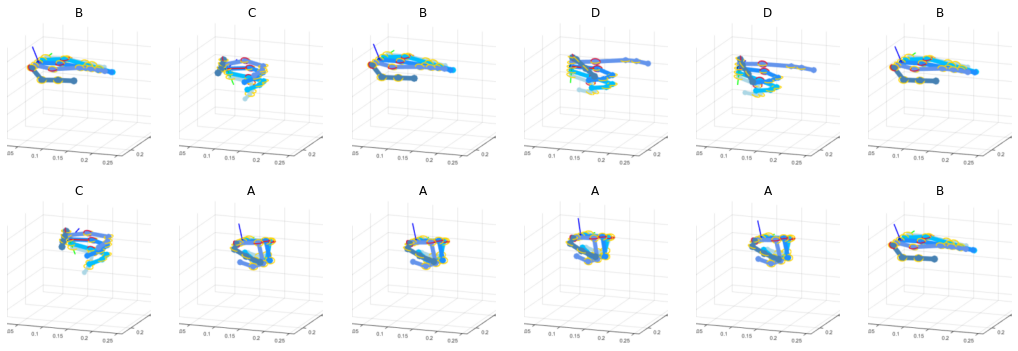

In [107]:
dl.valid.show_batch(max_n=12, nrows=2)

Convoluted neural network (CNN) is the de facto standard neural network type for image classification. We will use resnet34 (i.e. a well known 34 layers deep CNN).

We are using the .fine_tune method instead of .fit because we are leveraging on the pretrained general purpose resnet model to perform transfer learning. In the fine_tune we specify the number of epochs to be 4.

In [108]:
learn = cnn_learner(dl, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.632521,0.001623,0.000000,05:47


epoch,train_loss,valid_loss,error_rate,time
0,0.009042,0.000155,0.000000,07:37
1,0.006364,0.000003,0.000000,07:41
2,0.005731,0.000004,0.000000,07:47
3,0.004518,0.000004,0.000000,07:40


Looking at the Confusion Matrix for better visualization of the results.

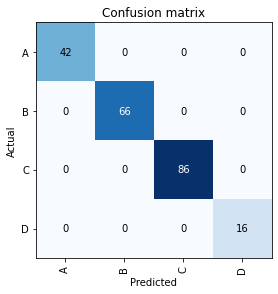

In [109]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

fast.ai also provides a easy method that allows us to find out which are the images where there was the highest loss. 

The loss is a number that is higher if the model is incorrect (especially if it is also confident of its incorrect answer), or if it is correct, but not confident of its correct answer.

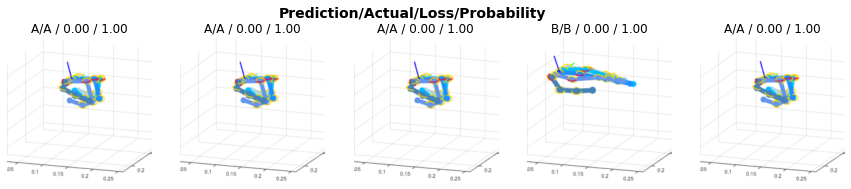

In [110]:
interpretation.plot_top_losses(5, nrows=1)

export the model

In [111]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

Use model for inference

In [113]:
learn_inf = load_learner(path/'export_20210513.pkl')

In [117]:
learn_inf.predict('/gdrive/MyDrive/Gesture/test_images/test_image_A_001.png')

('A', tensor(0), tensor([1.0000e+00, 2.5746e-10, 5.0018e-08, 1.3708e-07]))

In [118]:
learn_inf.dls.vocab

['A', 'B', 'C', 'D']

# Nuova sezione